In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
def divideData(fframe):
#     X,Y = np.where(np.isnan(fframe))
#         for x,y in zip(X,Y):
#     fframe.iloc[x,y] = 0
    trp = fframe.iloc[:500]
    tsp = fframe.iloc[500:600]
    vp = fframe.iloc[600:629]
    
    return trp,tsp,vp

In [140]:
# ['MLS', Mean Lenght of Sentence
#  'MLT', Mean Lenght of T units
#  'MLC', Mean Lenght of Clauses
#  'C/S', Clause per T Sentence
#  'VP/T',Verb Prase per T unit
#  'C/T', Clause per T unit
#  'DC/C', Dependent Clause per Clause
#  'DC/T', Dependent Clause per T unit
#  'T/S', T unit per Sentence
#  'CT/T', Complex T unit per Sentence
#  'CP/T', Co-ordinate Phrase per T Unit
#  'CP/C', Co-ordinate Phrase per Clause
#  'CN/T', Complex Nominal per T unit
#  'CN/C', Complex Nominal Per Clause
#  'DC/S', Dependent Clause per Sentence
#  'CT/S', Complex T-unit Per Sentence
#  'CP/S', Co-ordinate Phrase per Sentence
#  'L1/S', CEFR Language level1
#  'L2/S', CEFR Language level2
#  'L3/S', CEFR Language level3
#  'L4/S', CEFR Language level4
#  'L5/S', CEFR Language level5
#  'L6/S', CEFR Language level6
#  'VP/S', Verb Phrase per Sentence
#  'NP/S', Noun Phrase per Sentence
#  'PP/S', Para Phrase per Sentence
#  'Avg_NP', Avg Noun Phrase Length
#  'Avg_PP', Avg Preposition Phrase Length
#  'Avg_VP', Avg Verb Phrase Length
#  'Sbar/S', Subordinate Clause Per Sentence
#  'treeH/S', Avg Parse Tree Height per Sentence
#  'letter/W', no of letter per Word
#  'NV', Noun Variation
#  'VV1', Verb Variation 1
#  'svv', Squared Verb Variation
#  'cvv', Corrected Verb Variation
#  'advvv', Adverb Verb Varaition
#  'adjvv', Adjactive Verb Variation
#  'LD', Lexical Density
#  'ttr', Type tokken ration
#  'rttr', root type tokken Ratio
#  'cttr', Corrected Type Tokken Ration
#  'bttr', Bi logrithmic Type tokken Ration
#  'uber', Uber Index
#  'awlF', Academic Word List
#  'ari', Automated Readability Index
#  'aspw', Average Syllable per word
#  'cole_l_i', coleman Leua Index
#  'dale_c_r', dale_chall_readability_score
#  'diff_w', difficult_words
#  'flesch_k_g', flesch_kincaid_grade
#  'flesch_e_r', flesch_reading_ease
#  'gun_fog', gunning_fog
#  'lexi_c', lexicon_count
#  'linsear_w', linsear_write_formula
#  'li_x', lix
#  'modvvv'] modifier Varition

dnl = ['awlF'] #Since can't be empty

def setCreator(fframe):
    
    # Syntax
    SLASyntax = fframe[list(fframe)[:14] ]
    otherSyntax = fframe[list(fframe)[14:17] + list(fframe)[23:31]]
    totalSyntax = fframe[list(fframe)[:17] + list(fframe)[23:31]]
    
    # Difficult Word
    diffWord = fframe[list(fframe)[17:23] ]
    
    # Traditional Features
    tradfea=['MLS','aspw','letter/W']
    traditionalFeatures = fframe[tradfea]
    
    
    # Traditional Formulas
    trf = ['flesch_k_g','cole_l_i']
    traditionalFormulas = fframe[trf]
    
    
    
    tradionalData = fframe[trf+tradfea]
    
    #OtherFormula
    of = ['ari','dale_c_r','diff_w','flesch_e_r','gun_fog','lexi_c','linsear_w','li_x']
    otherFormula = fframe[of]
    
    #onlyFormulas
    onlyFormulas = fframe[trf+of]
    
    #SLALexicalFeatures
    lexf = ['NV','VV1','svv','cvv','advvv','adjvv','LD','ttr','rttr','cttr','bttr','uber','modvvv']
    lexicalFeatures = fframe[(list(fframe))[32:45]]
    
    olex = ['letter/W','awlF','aspw']
    otherLexF = fframe[olex]
    
    totLexF = fframe[olex + lexf]
    
    
    #ALLThem
    ttsyntx = list(fframe)[:17] + list(fframe)[23:31]
    
    allthemF = ttsyntx + olex + lexf 
    print(allthemF)
    totalF = fframe[allthemF]
    
    daloNikalo = fframe[dnl] #Since Can't be empty
    return [fframe,daloNikalo,SLASyntax,otherSyntax,totalSyntax,diffWord,traditionalFeatures,traditionalFormulas,tradionalData,otherFormula,onlyFormulas,lexicalFeatures,otherLexF,totLexF,totalF]
#SLA #Best10Syn, #Best10Lex, AllLexical, Best10All


#list(tr)

In [141]:
def trainVal(model,WholeData,WholeLabels):
    trData = WholeData[0]
    valData = WholeData[1]
    tsData = WholeData[2]
    
    trLabel = WholeLabels[0]
    valLabel = WholeLabels[1]
    
    scaler = StandardScaler()
    # Normalization : http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    trData = scaler.fit_transform(trData)
    tsData = scaler.transform(tsData)
    valData = scaler.transform(valData)

    # Fitting the Model
    model.fit(trData, trLabel)
    
    # Predicting the Accuracy on the train Data
    predictValue=model.predict(trData)
    trAcc = sum(predictValue == trLabel)/(len(trData))
    
    # Predicting the Accuracy on the Validation Data
    predictValue=model.predict(valData)
    valAcc = sum(predictValue == valLabel)/(len(valData))
    
    #No attempt for testing here. Leaved it for the latter part.
    return (model,trAcc,valAcc,tsData)

In [142]:
def cleanIt(fframe):
    del fframe['Unnamed: 0']
    #del fframe['Unnamed: 0.1']
    del fframe["W/S"]
    del fframe["W"]
    del fframe["S"]
    del fframe["VP"]
    del fframe["C"]
    del fframe["T"]
    del fframe["CT"]
    del fframe["CP"]
    del fframe["CN"]
    del fframe["Filename"]
    del fframe["DC"]
    #del fframe["aspw"]
    del fframe["Syl/W"]
    fframe["modvvv"] = fframe['advvv']+fframe['adjvv']
    return fframe

In [143]:
#Reading the files
c1 = pd.read_csv("ffff/lexwr2SyntacticFeature.csv")
c2 = pd.read_csv("ffff/lexwr3SyntacticFeature.csv")
c3 = pd.read_csv("ffff/lexwr4SyntacticFeature.csv")
c4 = pd.read_csv("ffff/lexbitks3SyntacticFeature.csv")
c5 = pd.read_csv("ffff/lexbitgcseSyntacticFeature.csv")
len(c5)
# /home/sp/nlpfinal/All_Features/lexbitgcseSyntacticFeature.csv
# /home/sp/nlpfinal/All_Features/lexbitks3SyntacticFeature.csv
# /home/sp/nlpfinal/All_Features/lexwr2SyntacticFeature.csv
# /home/sp/nlpfinal/All_Features/lexwr3SyntacticFeature.csv
# /home/sp/nlpfinal/All_Features/lexwr4SyntacticFeature.csv

7615

In [144]:
c1["class"] = 1
c2["class"] = 2
c3["class"] = 3
c4["class"] = 4
c5["class"] = 5

In [145]:
tr1, ts1, v1 = divideData(c1)
tr2, ts2, v2 = divideData(c2)
tr3, ts3, v3 = divideData(c3)
tr4, ts4, v4 = divideData(c4)
tr5, ts5, v5 = divideData(c5)

# Merging Pandas Dataframes : https://pandas.pydata.org/pandas-docs/stable/merging.html
tr = [tr1,tr2,tr3,tr4,tr5]
tr = pd.concat(tr)
ts = [ts1,ts2,ts3,ts4,ts5]
ts = pd.concat(ts)
v = [v1,v2,v3,v4,v5]
v = pd.concat(v)

tr = cleanIt(tr)
ts = cleanIt(ts)
v = cleanIt(v)

trainLabel = tr["class"]
valLabel = v["class"]
testLabel = ts["class"]

del tr["class"]
del ts["class"]
del v["class"]


Wholelabels = [trainLabel,valLabel,testLabel]

In [146]:
#  0:fframe, 1:daloNikalo, 2:SLASyntax, 3:otherSyntax,
#  4:totalSyntax, 5:diffWord, 6:traditionalFeatures,
#  7:traditionalFormulas, 8:tradionalData, 9:otherFormula,
#  10:onlyFormulas, 11:lexicalFeatures, 12:otherLexF, 13:totLexF, 14:totalF]
Tr = setCreator(tr)
Ts = setCreator(ts)
Vl = setCreator(v)

selectSet = 0
trainData = Tr[selectSet]
valData = Vl[selectSet]
tsData = Ts[selectSet]

wholeData = [trainData,valData,tsData]
#trainData

['MLS', 'MLT', 'MLC', 'C/S', 'VP/T', 'C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C', 'DC/S', 'CT/S', 'CP/S', 'VP/S', 'NP/S', 'PP/S', 'Avg_NP', 'Avg_PP', 'Avg_VP', 'Sbar/S', 'treeH/S', 'letter/W', 'awlF', 'aspw', 'NV', 'VV1', 'svv', 'cvv', 'advvv', 'adjvv', 'LD', 'ttr', 'rttr', 'cttr', 'bttr', 'uber', 'modvvv']
['MLS', 'MLT', 'MLC', 'C/S', 'VP/T', 'C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C', 'DC/S', 'CT/S', 'CP/S', 'VP/S', 'NP/S', 'PP/S', 'Avg_NP', 'Avg_PP', 'Avg_VP', 'Sbar/S', 'treeH/S', 'letter/W', 'awlF', 'aspw', 'NV', 'VV1', 'svv', 'cvv', 'advvv', 'adjvv', 'LD', 'ttr', 'rttr', 'cttr', 'bttr', 'uber', 'modvvv']
['MLS', 'MLT', 'MLC', 'C/S', 'VP/T', 'C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C', 'DC/S', 'CT/S', 'CP/S', 'VP/S', 'NP/S', 'PP/S', 'Avg_NP', 'Avg_PP', 'Avg_VP', 'Sbar/S', 'treeH/S', 'letter/W', 'awlF', 'aspw', 'NV', 'VV1', 'svv', 'cvv', 'advvv', 'adjvv', 'LD', 'ttr', 'rttr', 'cttr', 'bttr', 'uber', 'modvvv'

In [156]:
## The SVM : http://scikit-learn.org/stable/modules/svm.html
#Logistic Regression 
## http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
##MLP 
#http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
m1 = svm.SVC(C=5, cache_size=200, class_weight=None, coef0=10,
      decision_function_shape='ovr', degree=2, gamma="auto", kernel='poly',
      max_iter=-1, probability=False, random_state=None, shrinking=False,
      tol=0.001, verbose=False)
    



m2 = linear_model.LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1234, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

m3 = MLPClassifier(activation='logistic', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=100000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [157]:
(m3,trAcc,valAcc,t1Data) = trainVal(m3,wholeData,Wholelabels)

In [158]:
trAcc,valAcc

(0.758, 0.7931034482758621)

In [159]:
(sum(testLabel == m3.predict(t1Data)))/len(testLabel)

0.77

In [189]:
# tra = []
# va = []
# gval = [0.0001,0.001,0.01,0.1,1,10]
# for par in [0.001,0.01,0.1,1,5,10,20,50,60]:
#     m1 = svm.SVC(C=10, cache_size=200, class_weight=None, coef0=10,
#       decision_function_shape='ovr', degree=3, gamma=par, kernel='poly',
#       max_iter=-1, probability=False, random_state=None, shrinking=False,
#       tol=0.001, verbose=False)
#     (m1,trAcc,valAcc,t1Data) = trainVal(m1,wholeData,Wholelabels)
    
#     tra.append(trAcc)
#     va.append(valAcc)

In [ ]:
va

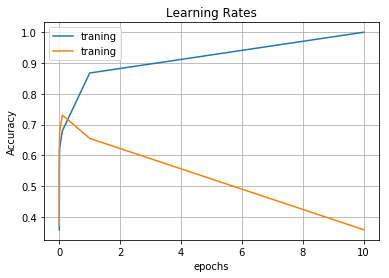

In [508]:
f = plt.figure()
plt.plot(gval,tra,label="traning")
plt.plot(gval,va,label="traning")
#plt.plot(x,y5,label=n5)
# plt.plot(x,y6,label=n6)
# plt.plot(x,y7,label=n7)


plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Learning Rates')
plt.grid()
plt.legend()
plt.show()
f.savefig("gamma.pdf", bbox_inches='tight')